# Supplementary Figure 5

In [1]:
from utils import *
from plot_params import *
from scipy.stats import pearsonr, kurtosis, ks_2samp
from scikit_posthocs import posthoc_dunn
from scipy.stats import iqr, wilcoxon
from scipy.special import xlogy
from scipy.spatial.distance import pdist
from itertools import compress

In [2]:
save = True
savepath = r'D:\Data\DeepMouse\Figures\FigureS5'

In [3]:
fp = r'D:\Data\DeepMouse\Results\generalisation\activations_filtered2.npy'
data = np.load(fp, allow_pickle=1).item()
data_sum = []
for i, region in enumerate(regions):
    own = data[region][i]
    mask = np.ones(len(regions)+1).astype(bool)
    mask[i] = False
    mask[-1] = False
    other = np.concatenate(list(compress(data[region], mask)), axis=0)
    nat = data[region][-1]
    data_sum.append([own, other, nat])

In [4]:
neuronmean = np.array([[np.median(data_sum[i][j], axis=0) for j in range(2)] for i in range(len(regions))])

c:\Users\rudit\anaconda3\envs\mnp_torch\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [13]:
def plot_box(data, figsize=(6,5), ylabel=''):
    '''Plot wdf data as boxplots'''
    fig, ax = pl.subplots(figsize=figsize)

    lw = 0.5
    for i, region in enumerate(regions):
        # x = np.arange(1,3)+i*2+i
        # for j in range(data[i][0].shape[0]):
        #     ax.plot(x, [data[i][0][j], data[i][1][j]], 'k-', lw=.1, alpha=.2)
        # ax.plot(x, [np.median(data[i][0]), np.median(data[i][1])], ls='-', marker='s', color=colors[i], lw=1, ms=2)
        bp1 = ax.boxplot(data[i], showfliers=False, positions=np.arange(1,3)+i*2+i, widths=0.6, 
                        patch_artist=True, medianprops=dict(color='k', linewidth=lw), boxprops=dict(linewidth=lw), whiskerprops=dict(linewidth=lw),
                        capprops=dict(linewidth=lw))
        print(wilcoxon(data[i][0], data[i][1]))

        cs = [colors[i], [.4]*3]
        for patch, color in zip(bp1['boxes'], cs):
            patch.set_facecolor(color)

    ax.set_ylabel(ylabel)
    ax.set_xlim(0,len(regions)*2+len(regions))
    ax.set_xticks(np.arange(1.5, (len(regions))*3, 3))
    ax.set_xticklabels(regions)
    return fig

WilcoxonResult(statistic=250896.0, pvalue=4.431797185025997e-60)
WilcoxonResult(statistic=508964.0, pvalue=0.05746195952024878)
WilcoxonResult(statistic=167178.0, pvalue=3.0836756369737703e-40)
WilcoxonResult(statistic=136369.0, pvalue=7.199080549331723e-50)
WilcoxonResult(statistic=292338.0, pvalue=1.1308293422315094e-21)
WilcoxonResult(statistic=126887.0, pvalue=3.654546694312355e-22)


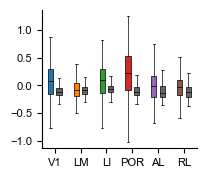

In [15]:
fig = plot_box(neuronmean, figsize=(2,1.8))
if save:
    fig.savefig(os.path.join(savepath, 'insilico_validation.eps'), bbox_inches='tight')